## Image Classification for CIPHAR-10 using CNNs 

CIPHAR-10 is dataset consisting of several images which are diveded into 10 categories
1. Airplane 
2. Cars
3. Birds
4. Cat
5. Deer
6. Dogs
7. Frogs
8. Horses
9. Ships
10. Trucks

Dataset has around 60000 color images of size 32 x 32 of each class
Data Source - http://www.cs.toronto.edu/~kriz/cifar.html

#### Importing libraries and datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from keras.datasets import cifar10

In [4]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

In [8]:
y_train.shape

(50000, 1)

#### Visualizing the data

This images belongs to class [6]


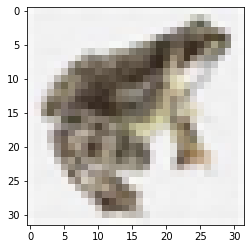

In [9]:
i = 1017
plt.imshow(X_train[i])
print('This images belongs to class',y_train[i])

This images belongs to class [0]


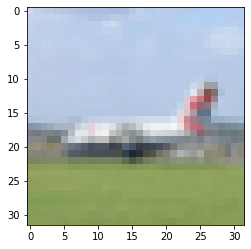

In [10]:
i = 1278
plt.imshow(X_train[i])
print('This images belongs to class',y_train[i])

This images belongs to class [3]


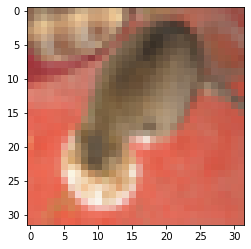

In [11]:
i = 9865
plt.imshow(X_train[i])
print('This images belongs to class',y_train[i])

This images belongs to class [2]


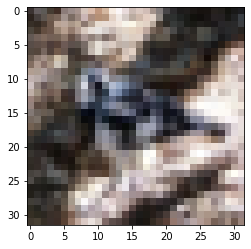

In [12]:
i = 38459
plt.imshow(X_train[i])
print('This images belongs to class',y_train[i])

This images belongs to class [8]


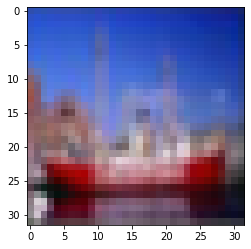

In [13]:
i = 49857
plt.imshow(X_train[i])
print('This images belongs to class',y_train[i])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


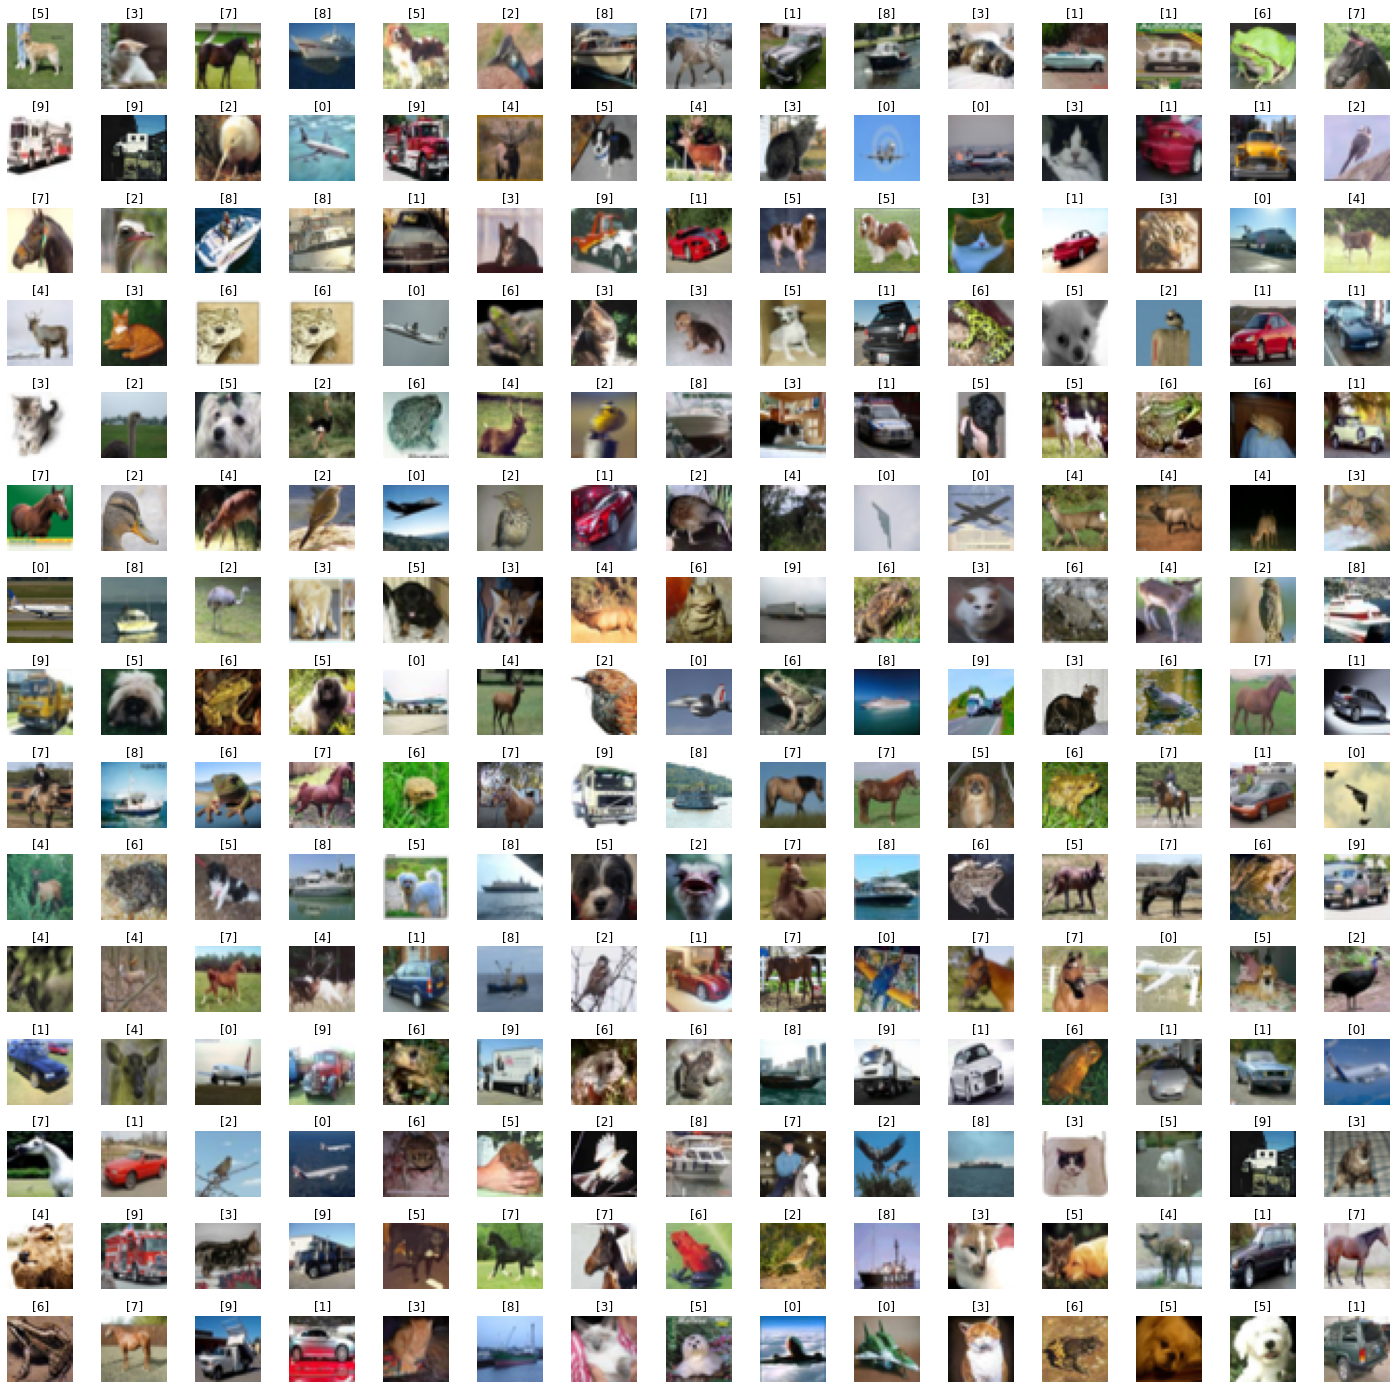

In [14]:
W_grid = 15
L_grid = 15

fig,axes = plt.subplots(L_grid, W_grid, figsize=(25,25))
axes = axes.ravel()

n_training = len(X_train)


###### plotting random images in the above grid

for i in np.arange(0, L_grid * W_grid):
        index = np.random.randint(0,n_training)  ## picking random number
        axes[i].imshow(X_train[index])
        ## adding class of images on title to which the images belongs
        axes[i].set_title(y_train[index])
        
        ## removing values of axis
        axes[i].axis('off')
### increasing the spacing between the images
plt.subplots_adjust(hspace=0.4)

In [15]:
n_training

50000

#### Preparing Data

In [16]:
## converting images into float type so we can do data augmentation if required

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
        
        

In [17]:
# No. of categories
number_category = 10

In [18]:
y_train ### as we can see our lables are into decimal format converting it into binary before feeding it to network
 ## so when we pass images it will pass that category neuron and not others

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [19]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [20]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.utils.np_utils import to_categorical
#from tensorflow.keras.utils import to_categorical
y_train = tf.keras.utils.to_categorical(y_train,number_category)

In [21]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [23]:
import keras
from tensorflow.keras.utils import to_categorical
y_test = tf.keras.utils.to_categorical(y_test,number_category)

In [24]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [25]:
### performing some data normalization as we can see below no. from 0 to 255.. will convert it to 0 to 1
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [26]:
X_train = X_train/255
X_test = X_test/255

In [27]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [28]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [29]:
X_train.shape

(50000, 32, 32, 3)

In [30]:
Input_shape = X_train.shape[1:]

In [31]:
Input_shape

(32, 32, 3)

### Training our Model

In [32]:
from keras.models import Sequential  ## building our model in sequential way
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout  ## layers in our NN
from keras.optimizers import Adam # optimzer
from keras.callbacks import TensorBoard  # we are relying on tensorflow as backend

In [33]:
cnn_model = Sequential()

In [34]:
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu',input_shape = Input_shape))

In [35]:

cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
cnn_model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))


## Flattening

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 1024,activation='relu')) ## hidden layer
cnn_model.add(Dense(units = 1024,activation='relu')) ## hidden layer

## Output Layer

cnn_model.add(Dense(units=10,activation='softmax')) ## softmax is used as we are solving image classification


#### fitting our model to our data

In [36]:
cnn_model.compile(loss='categorical_crossentropy',optimizer = keras.optimizers.RMSprop(learning_rate  = 0.0001),metrics=['accuracy'])

In [37]:
X_train.shape

(50000, 32, 32, 3)

In [38]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [39]:
y_train.shape

(50000, 10)

In [40]:
 #### Fitting our training data to our model
    
history = cnn_model.fit(X_train, y_train, batch_size= 32,epochs=15, shuffle = True)

Epoch 1/15
1563/1563 [==============================] - 74s 19ms/step - loss: 1.8495 - accuracy: 0.3195
Epoch 2/15
1563/1563 [==============================] - 29s 18ms/step - loss: 1.3230 - accuracy: 0.5248
Epoch 3/15
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0928 - accuracy: 0.6154
Epoch 4/15
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9499 - accuracy: 0.6666
Epoch 5/15
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8326 - accuracy: 0.7089
Epoch 6/15
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7291 - accuracy: 0.7509
Epoch 7/15
1563/1563 [==============================] - 29s 18ms/step - loss: 0.6552 - accuracy: 0.7702
Epoch 8/15
1563/1563 [==============================] - 29s 18ms/step - loss: 0.5884 - accuracy: 0.7961
Epoch 9/15
1563/1563 [==============================] - 29s 18ms/step - loss: 0.5282 - accuracy: 0.8148
Epoch 10/15
1563/1563 [==============================] - 29s 18m

Evaluating our model

In [41]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [42]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy:{}'.format(evaluation[1]))

313/313 [==============================] - 3s 7ms/step - loss: 0.7186 - accuracy: 0.7895
Test Accuracy:0.7894999980926514


In [43]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 8, 8, ..., 5, 1, 7])

In [44]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [47]:
y_test = y_test.argmax(1)

AxisError: ignored

In [48]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

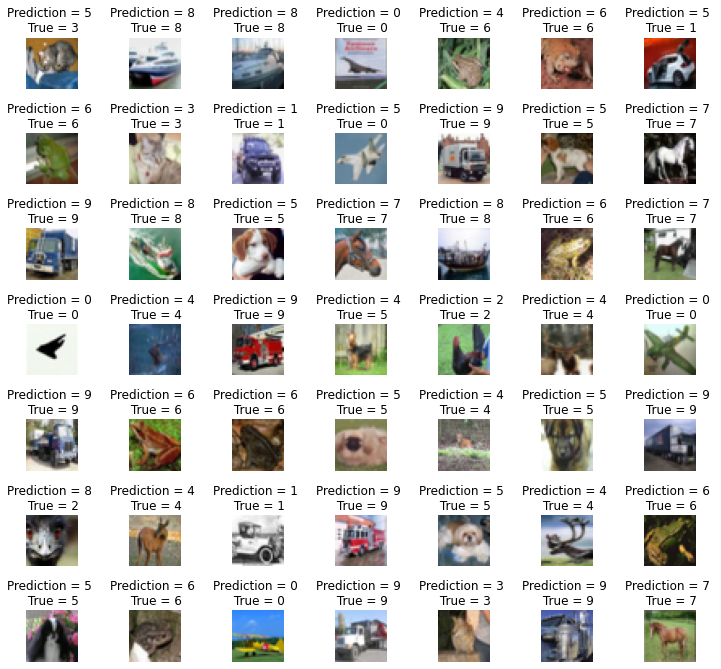

In [49]:
L = 7
W = 7
fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {} \n True = {}'.format(predicted_classes[i],y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=1)

Confusion metrics for model evaluaton


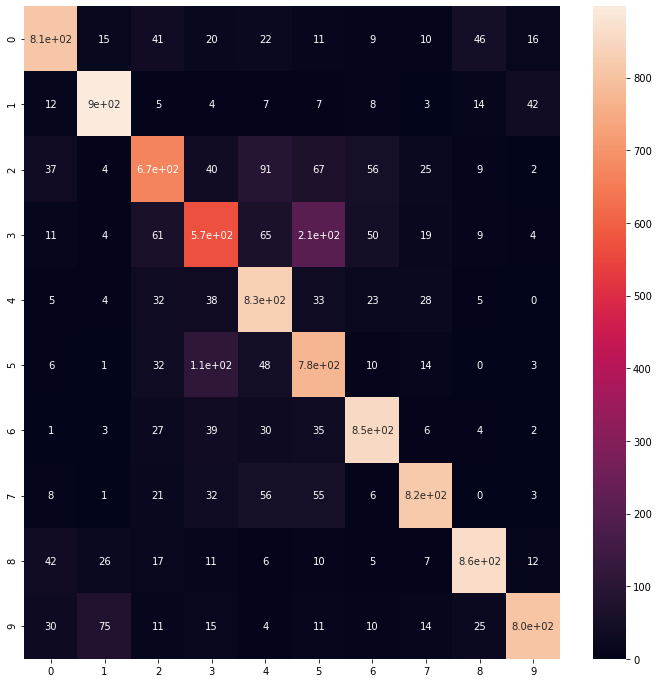

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm =  confusion_matrix(y_test,predicted_classes)
cm
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True)

Saving Our Model

import os
directory = os.path.join(os.getcwd(),'ciphar_model')

if not os.path.isdir(directory):
  os.makedirs(directory)
model_path = os.path.join(directory,'keras_ciphar.h5')
cnn_model.save(model_path)

In [51]:
cnn_model.save('keras_cipher.h5')

Data Augmentation


In [117]:
import keras
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [118]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [119]:
X_train.shape

(50000, 32, 32, 3)

In [120]:
X_test.shape

(10000, 32, 32, 3)

In [121]:
n = 8
X_train_sample = X_train[:n]

In [122]:
X_train_sample.shape

(8, 32, 32, 3)

In [123]:
from keras.preprocessing.image import ImageDataGenerator
#dataget_train = ImageDataGenerator(rotation_range = 90)

dataget_train = ImageDataGenerator(vertical_flip=True)
#dataget_train = ImageDataGenerator(height_shift_range=0.5)
#dataget_train = ImageDataGenerator(brightness_range=(1,5))


dataget_train.fit(X_train_sample)

In [124]:
pip install Pillow

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning:     `toimage` is deprecated!
    `toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use Pillow's ``Image.fromarray`` directly instead.
  import sys


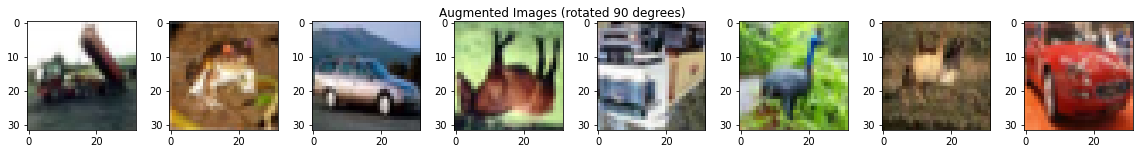

In [125]:
from scipy.misc import toimage

fig = plt.figure(figsize=(20,2))
for x_batch in dataget_train.flow(X_train_sample,batch_size=n):
  for  i in range(0,n):
    ax = fig.add_subplot(1,n,i+1)
    ax.imshow(toimage(x_batch[i]))
  fig.suptitle('Augmented Images (rotated 90 degrees)')
  plt.show()
  break;


Model Training For Augmented Dataset

In [52]:
from keras.preprocessing.image import ImageDataGenerator

datagen =  ImageDataGenerator(
    
                rotation_range =90,
                width_shift_range = 0.1,
                horizontal_flip = True,
                vertical_flip = True

                )

In [53]:
datagen.fit(X_train)

In [54]:
cnn_model.fit_generator(datagen.flow(X_train,y_train,batch_size=32),epochs=5)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1563/1563 [==============================] - 51s 32ms/step - loss: 1.4918 - accuracy: 0.4715
Epoch 2/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3370 - accuracy: 0.5267
Epoch 3/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2714 - accuracy: 0.5527
Epoch 4/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2346 - accuracy: 0.5650
Epoch 5/5
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2073 - accuracy: 0.5770


In [56]:
score = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy',score[1])

ValueError: ignored

In [57]:
cnn_model.save('keras_cipher_augmented.h5')